In [1]:
import pandas as pd
import numpy as np

In [113]:
#data = pd.read_csv("../../merged_dataset_ellie.csv")
data = pd.read_csv("../../data/combined_jun13_train.csv", encoding = "ISO-8859-1")

In [114]:
pd.set_option('max_columns', None)

In [115]:
data.sample(10)

,Unnamed: 0,Unnamed: 0.1,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,DEM_CANDIDATE,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,WINNING_CANDIDATE,WINNING_PARTY,WINNING_PARTY_BINARY,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,TRAIN
9958,9958,9958,13275,200420133,2004,20,133,Kansas,Neosho County,20133.0,George W. Bush,John Kerry,4705.0,2424.0,7231.0,George W. Bush,republican,1,1.0,1.0,4.9,25209.0,39,19,72,93,235,294,79,91,2.0,3,8525,8090,16615,8184,7767,4670,2370,2300,3623,1834,1789,4549,2281,2268,3773,1605,2168,0.002347,0.001144,0.004333,0.005597,0.014144,0.017695,0.004755,0.005477,0.000120,0.000181,0.492567,0.467469,0.513091,0.486909,0.281071,0.218056,0.273789,0.227084,0
15217,15217,15217,18635,200855011,2008,55,11,Wisconsin,Buffalo County,55011.0,John McCain,Barack Obama,2923.0,3949.0,7000.0,Barack Obama,democrat,0,0.0,NaN,4.3,0.0,21,8,14,25,71,132,19,22,1.0,0,6885,7000,13885,6784,6884,3528,1767,1761,2929,1516,1413,4192,2188,2004,3236,1529,1707,0.001512,0.000576,0.001008,0.001801,0.005113,0.009507,0.001368,0.001584,0.000072,0.000000,0.488585,0.495787,0.495859,0.504141,0.254087,0.210947,0.301909,0.233057,0
9897,9897,9897,13214,200420013,2004,20,13,Kansas,Brown County,20013.0,George W. Bush,John Kerry,3092.0,1268.0,4418.0,George W. Bush,republican,1,1.0,1.0,5.0,0.0,15,11,66,100,123,124,479,430,1.0,0,5282,4989,10271,4625,4354,2890,1472,1418,2069,1040,1029,2813,1386,1427,2499,1091,1408,0.001460,0.001071,0.006426,0.009736,0.011975,0.012073,0.046636,0.041865,0.000097,0.000000,0.450297,0.423912,0.514263,0.485737,0.281375,0.201441,0.273878,0.243306,0
91,91,91,117,20125013,2012,5,13,Arkansas,Calhoun County,5013.0,Mitt Romney,Barack Obama,1458.0,660.0,2174.0,Mitt Romney,republican,1,1.0,NaN,9.1,0.0,6,5,611,585,70,87,6,13,0.0,1,2644,2718,5362,1990,2083,1266,657,609,1152,627,525,1648,850,798,1296,584,712,0.001119,0.000932,0.113950,0.109101,0.013055,0.016225,0.001119,0.002424,0.000000,0.000186,0.371130,0.388474,0.493100,0.506900,0.236106,0.214845,0.307348,0.241701,0
11583,11583,11583,14927,200448081,2004,48,81,Texas,Coke County,48081.0,George W. Bush,John Kerry,1338.0,266.0,1610.0,George W. Bush,republican,1,1.0,NaN,5.9,22086.0,5,4,2,47,310,334,18,16,0.0,1,1842,1836,3678,1805,1756,987,552,435,619,304,315,943,445,498,1129,535,594,0.001359,0.001088,0.000544,0.012779,0.084285,0.090810,0.004894,0.004350,0.000000,0.000272,0.490756,0.477433,0.500816,0.499184,0.268352,0.168298,0.256389,0.306960,0
11911,11911,11911,15255,200451037,2004,51,37,Virginia,Charlotte County,51037.0,George W. Bush,John Kerry,3166.0,2223.0,5438.0,George W. Bush,republican,1,1.0,NaN,6.1,0.0,14,10,2178,1865,65,135,8,12,0.0,0,6446,6019,12465,4201,4090,3272,1653,1619,2776,1387,1389,3474,1711,1763,2943,1268,1675,0.001123,0.000802,0.174729,0.149619,0.005215,0.010830,0.000642,0.000963,0.000000,0.000000,0.337024,0.328119,0.517128,0.482872,0.262495,0.222704,0.278700,0.236101,0
1692,1692,1692,2061,201228057,2012,28,57,Mississippi,Itawamba County,28057.0,Mitt Romney,Barack Obama,7393.0,1706.0,9318.0,Mitt Romney,republican,1,1.0,1.0,8.4,31876.0,40,15,711,701,130,176,26,32,1.0,1,11974,11445,23419,11127,10636,6437,3264,3173,5740,2852,2888,6196,3123,3073,5046,2206,2840,0.001708,0.000641,0.030360,0.029933,0.005551,0.007515,0.001110,0.001366,0.000043,0.000043,0.475127,0.454161,0.511294,0.488706,0.274862,0.245100,0.264572,0.215466,0
10106,10106,10106,13431,200421215,2004,21,215,Kentucky,Spencer County,21215.

In [119]:
## some cleanup..

data.isnull().sum()

Unnamed: 0          0
Unnamed: 0.1        0
ID                  0
YEAR_FIPS           0
YEAR                0
                   ..
TOT_POP_LESS19%     0
TOT_POP_20to39%     0
TOT_POP_40to59%     0
TOT_POP_Above60%    0
TRAIN               0
Length: 68, dtype: int64

In [35]:
np.all(np.isfinite(data))

False

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15437 entries, 0 to 15436
Data columns (total 68 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15437 non-null  int64  
 1   Unnamed: 0.1           15437 non-null  int64  
 2   ID                     15437 non-null  int64  
 3   YEAR_FIPS              15437 non-null  int64  
 4   YEAR                   15437 non-null  int64  
 5   STATE_FIPS             15437 non-null  int64  
 6   COUNTY_FIPS            15437 non-null  int64  
 7   STATE                  15437 non-null  object 
 8   COUNTY                 15437 non-null  object 
 9   FIPS                   15437 non-null  float64
 10  REP_CANDIDATE          15437 non-null  object 
 11  DEM_CANDIDATE          15437 non-null  object 
 12  REP_VOTES              15437 non-null  float64
 13  DEM_VOTES              15437 non-null  float64
 14  COUNTY_TOTALVOTES      15437 non-null  float64
 15  WI

# cleaning/wrangling...

In [8]:
# data['state'] = data['state'].astype('category').cat.codes
# data['state_po'] = data['state_po'].astype('category').cat.codes
# data['county'] = data['county'].astype('category').cat.codes
# data['winning party'] = data['winning party'].astype('category').cat.codes

In [9]:
# data.info()

In [120]:
data.drop(['WINNING_CANDIDATE', 'REP_CANDIDATE', 'DEM_CANDIDATE', 'WINNING_PARTY', 'COUNTY', 'STATE'], axis=1, inplace=True)

In [121]:
from sklearn.model_selection import train_test_split

In [52]:
# X = data.drop("winning_party_binary", axis=1)
# y = data["winning_party_binary"]

In [163]:
filter_year =  data['YEAR'] == 2012
type(filter_year)

pandas.core.series.Series

In [211]:
#data.drop(data[data['TRAIN'] != 1])
#data.drop(data[data['TRAIN'] != 1])
X = data.query('TRAIN != 1')
X = X.reset_index(drop=True)

In [212]:
len(X)

14683

In [56]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [272]:
def train_test_split_by_year(X, year, train_filter=False):
    
    X_copy = X
    
    filter_year =  X['YEAR'] == year
    not_filter_year =  X['YEAR'] != year

    X_test = X[filter_year]
    X_test = X_test.drop("WINNING_PARTY_BINARY", axis=1)
    print('X_test: {}'.format(X_test.shape))
    
    y_test = X[filter_year]
    y_test = y_test["WINNING_PARTY_BINARY"]
    print('y_test: {}'.format(y_test.shape))
    
    
    if (train_filter == True):
        X_copy = X_copy.query('TRAIN != 1')
        X_copy = X_copy.reset_index(drop=True)
            
    X_train = X_copy[not_filter_year]
    X_train = X_train.drop("WINNING_PARTY_BINARY", axis=1)

    y_train = X_copy[not_filter_year]
    y_train = y_train["WINNING_PARTY_BINARY"]
    
    print('X_train: {}'.format(X_train.shape))
    print('y_train: {}'.format(y_train.shape))

    return X_train, X_test, y_train, y_test

In [273]:
X_train, X_test, y_train, y_test = train_test_split_by_year(data, 2016)


X_test: (3114, 61)
y_test: (3114,)
X_train: (12323, 61)
y_train: (12323,)


In [274]:
X_train, X_test, y_train, y_test = train_test_split_by_year(data, 2016, True)

X_test: (3114, 61)
y_test: (3114,)
X_train: (11569, 61)
y_train: (11569,)


/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [151]:
X_train.loc[X_train['YEAR'] == 2016]

,Unnamed: 0,Unnamed: 0.1,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,FIPS,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,TRAIN


In [154]:
X_train.loc[X_train['TRAIN'] == 1]

,Unnamed: 0,Unnamed: 0.1,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,FIPS,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,TRAIN
68,68,68,68,20122016,2012,2,16,2016.0,2876.0,4013.0,7181.0,6.9,0.0,613,1065,31,326,183,549,398,467,20.0,90,1829,3731,5560,666,1630,898,489,409,1777,1276,501,2354,1620,734,531,346,185,0.110252,0.191547,0.005576,0.058633,0.032914,0.098741,0.071583,0.083993,0.003597,0.016187,0.119784,0.293165,0.328957,0.671043,0.161511,0.319604,0.423381,0.095504,1
69,69,69,69,20122020,2012,2,20,2020.0,4544.0,3081.0,7964.0,5.4,55893.0,13146,11146,8083,9086,11199,11153,12641,11390,3081.0,3062,144284,149026,293310,95888,103406,84413,43415,40998,90099,46581,43518,83307,41953,41354,35491,17077,18414,0.044819,0.038001,0.027558,0.030977,0.038181,0.038025,0.043098,0.038833,0.010504,0.010439,0.326917,0.352548,0.491916,0.508084,0.287794,0.307180,0.284024,0.121002,1
70,70,70,96,20124001,2012,4,1,4001.0,8250.0,17147.0,25848.0,19.0,40041.0,131,92,58,122,1954,2223,26685,25904,8.0,18,35995,35837,71832,8568,9057,25155,12755,12400,16632,8627,8005,17993,8819,9174,12052,5636,6416,0.001824,0.001281,0.000807,0.001698,0.027202,0.030947,0.371492,0.360619,0.000111,0.000251,0.119278,0.126086,0.501100,0.498900,0.350192,0.231540,0.250487,0.167780,1
75,75,75,101,20124011,2012,4,11,4011.0,1592.0,1310.0,2974.0,8.2,61266.0,30,30,45,57,1954,2043,130,128,2.0,6,3980,4352,8332,3696,4054,2625,1412,1213,2032,1035,997,2233,1203,1030,1442,702,740,0.003601,0.003601,0.005401,0.006841,0.234518,0.245199,0.015602,0.015362,0.000240,0.000720,0.443591,0.486558,0.477676,0.522324,0.315050,0.243879,0.268003,0.173068,1
80,80,80,106,20124019,2012,4,19,4019.0,174779.0,201251.0,382250.0,7.4,42614.0,15069,12652,17727,20625,173966,166209,20669,19876,1080.0,1042,499499,482154,981653,431995,415165,257469,131376,126093,260626,131894,128732,252328,122842,129486,211230,96042,115188,0.015351,0.012888,0.018058,0.021010,0.177217,0.169315,0.021055,0.020247,0.001100,0.001061,0.440069,0.422924,0.508835,0.491165,0.262281,0.265497,0.257044,0.215178,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15420,15420,15420,18838,20088109,2008,8,109,8109.0,953.0,1730.0,2747.0,7.2,27221.0,22,20,13,17,1352,1390,80,85,1.0,0,3044,3104,6148,2870,2932,1609,795,814,1216,629,587,2067,1032,1035,1256,648,608,0.003578,0.003253,0.002115,0.002765,0.219909,0.226090,0.013012,0.013826,0.000163,0.000000,0.466818,0.476903,0.495120,0.504880,0.261711,0.197788,0.336207,0.204294,1
15424,15424,15424,18842,20088117,2008,8,117,8117.0,4883.0,9802.0,14899.0,3.7,106305.0,125,133,86,187,1534,1839,67,64,7.0,9,11942,14661,26603,11501,14092,5180,2710,2470,10391,6049,4342,8045,4317,3728,2987,1585,1402,0.004699,0.004999,0.003233,0.007029,0.057663,0.069128,0.002519,0.002406,0.000263,0.000338,0.432320,0.529715,0.448897,0.551103,0.194715,0.390595,0.302410,0.112281,1
15425,15425,15425,18843,20088119,2008,8,119,8119.0,8146.0,4513.0,12906.0,5.5,32729.0,103,61,47,78,531,527,109,119,7.0,11,11132,11575,22707,10642,11083,5491,2922,2569,4051,2046,2005,9087,4483,4604,4078,2124,1954,0.004536,0.002686,0.002070,0.003435,0.023385,0.023209,0.004800,0.005241,0.000308,0.000484,0.468666,0.488087,0.490245,0.509755,0.241820,0.178403,0.400185,0.179592,1
15432,15432,15432,18850,20089007,2008,9,7,9007.0,32907.0,52966.0

In [275]:
from sklearn.linear_model import LogisticRegression

In [276]:
model = LogisticRegression()

In [277]:
X_train

,Unnamed: 0,Unnamed: 0.1,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,FIPS,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,TRAIN
0,0,0,0,20121001,2012,1,1,1001.0,17379.0,6363.0,23932.0,0.0,NaN,6.9,33766.0,296,201,5152,4591,615,693,131,119,17.0,28,28084,26670,54754,22052,21357,16046,8188,7858,13845,6759,7086,15464,7577,7887,9399,4146,5253,0.005406,0.003671,0.094094,0.083848,0.011232,0.012657,0.002393,0.002173,0.000310,0.000511,0.402747,0.390054,0.512912,0.487088,0.293056,0.252858,0.282427,0.171659,0
1,1,1,1,20121003,2012,1,3,1003.0,66016.0,18424.0,85338.0,0.0,NaN,7.5,64282.0,833,551,8913,8421,3614,4450,670,660,55.0,73,93493,89618,183111,81752,78718,46410,23528,22882,42149,21095,21054,51691,25005,26686,42861,19990,22871,0.004549,0.003009,0.048675,0.045988,0.019737,0.024302,0.003659,0.003604,0.000300,0.000399,0.446461,0.429892,0.510581,0.489419,0.253453,0.230183,0.282293,0.234071,0
2,2,2,2,20121005,2012,1,5,1005.0,5550.0,5912.0,11509.0,0.0,NaN,11.5,64168.0,59,59,6111,6786,599,747,73,88,17.0,29,12826,14504,27330,6482,7414,6620,3373,3247,7401,4461,2940,7618,4124,3494,5691,2546,3145,0.002159,0.002159,0.223600,0.248299,0.021917,0.027333,0.002671,0.003220,0.000622,0.001061,0.237175,0.271277,0.469301,0.530699,0.242225,0.270801,0.278741,0.208233,0
3,3,3,3,20121007,2012,1,7,1007.0,6132.0,2202.0,8420.0,0.0,NaN,8.5,69624.0,10,12,1972,3069,110,300,32,36,5.0,26,10608,12264,22872,8491,9034,5691,3004,2687,6475,3809,2666,6426,3505,2921,4280,1946,2334,0.000437,0.000525,0.086219,0.134182,0.004809,0.013116,0.001399,0.001574,0.000219,0.001137,0.371240,0.394981,0.463799,0.536201,0.248820,0.283097,0.280955,0.187128,0
4,4,4,4,20121009,2012,1,9,1009.0,20757.0,2970.0,24006.0,0.0,NaN,6.9,60178.0,82,48,390,424,2081,2582,173,177,25.0,36,28988,28385,57373,27995,27415,15550,7963,7587,13866,7017,6849,15869,7941,7928,12088,5464,6624,0.001429,0.000837,0.006798,0.007390,0.036271,0.045004,0.003015,0.003085,0.000436,0.000627,0.487947,0.477838,0.505255,0.494745,0.271033,0.241682,0.276594,0.210691,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14678,15430,15430,18848,20089003,2008,9,3,9003.0,138716.0,268301.0,411785.0,0.0,NaN,6.0,55985.0,17439,17141,64798,59509,63648,60736,1769,1694,425.0,471,457152,427396,884548,364592,341018,231463,118803,112660,218261,108285,109976,263180,127372,135808,171644,72936,98708,0.019715,0.019378,0.073255,0.067276,0.071955,0.068663,0.002000,0.001915,0.000480,0.000532,0.412179,0.385528,0.516820,0.483180,0.261674,0.246749,0.297530,0.194047,0
14679,15431,15431,18849,20089005,2008,9,5,9005.0,46176.0,51037.0,98870.0,0.0,NaN,5.3,40175.0,1533,1331,1320,1475,3786,3801,217,231,36.0,41,96609,93257,189866,92380,89030,47295,24532,22763,38832,19343,19489,63925,31635,32290,39814,17747,22067,0.008074,0.007010,0.006952,0.007769,0.019940,0.020019,0.001143,0.001217,0.000190,0.000216,0.486554,0.468910,0.508827,0.491173,0.249097,0.204523,0.336685,0.209695,0
14680,15434,15434,18852,20089011,2008,9,11,9011.0,48460.0,74745.0,124765.0,0.0,NaN,5.4,46985.0,5192,5016,7922,8983,9809,10400,1341,1355,142.0,157,135947,134722,270669,117546,115307,68626,35281,33345,68420,35745,32675,82671,41086,41585,50952,22610,28342,0.019182,0.018532,0.029268,0.033188,0.036240,0.038423,0.004954,0

In [278]:
list = ["AA_FEMALE", "AA_MALE%", "BA_FEMALE%", "BA_MALE%", "H_FEMALE%", "H_MALE%", "IA_FEMALE%", "IA_MALE%", "NA_FEMALE%", "NA_MALE%", "WA_FEMALE", "WA_MALE%", "TOT_FEMALE%", "TOT_MALE%", "TOT_POP_LESS19%", "TOT_POP_20to39%", "TOT_POP_40to59%", "TOT_POP_Above60%"]

for l in list:
    data.loc[data[l] == np.finfo(np.float64).max]

In [279]:
##FIXME - remove when these columns become clean... 
X_train.drop(['HOUSE_WINNING_BINARY', 'SENATE_WINNING_BINARY' ], axis=1, inplace=True)
X_test.drop(['HOUSE_WINNING_BINARY', 'SENATE_WINNING_BINARY' ], axis=1, inplace=True)

In [280]:
model.fit(X_train, y_train)

/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [281]:
predictions = model.predict(X_test)

In [282]:
from sklearn.metrics import accuracy_score

In [283]:
print("{:.3f}%".format( accuracy_score(y_test, predictions) * 100))

91.137%


In [ ]:
### retest with Training=1 data.. 
X_train, X_test, y_train, y_test = train_test_split_by_year(data, 2016)


In [285]:
from sklearn.metrics import confusion_matrix

In [286]:
confusion_matrix(y_test, predictions)

array([[ 229,  260],
       [  16, 2609]])

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.51      0.67       694
           1       0.88      1.00      0.93      2420

   micro avg       0.89      0.89      0.89      3114
   macro avg       0.93      0.75      0.80      3114
weighted avg       0.90      0.89      0.88      3114



In [183]:
for idx, input, prediction, label in zip(enumerate(X_test), X_test, predictions, y_test):
    if prediction != label:
        print(idx)
        print("No.", idx[0], 'input,',input, ', has been classified as', prediction, 'and should be', label)

# Optimizations

In [125]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=34)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver}: {score:.3f}" )

/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effectiv

  liblinear: 0.850
  newton-cg: 0.998
  lbfgs: 0.857
  sag: 0.798
  saga: 0.796


In [141]:
logModel = LogisticRegression()

In [161]:
param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
#     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [162]:
from sklearn.model_selection import GridSearchCV


In [163]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)


In [164]:
#### warning: this will take up to 6 horus :) ##
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 124.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 355.6min finished
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [169]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [171]:
print (f'Accuracy: {best_clf.score(X,y):.3f}')

Accuracy: 0.983


In [172]:
predictions = best_clf.predict(X_test)

In [173]:
print("{:.3f}%".format( accuracy_score(y_test, predictions) * 100))

98.491%


In [174]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [175]:
matrix = confusion_matrix(y_test, predictions)

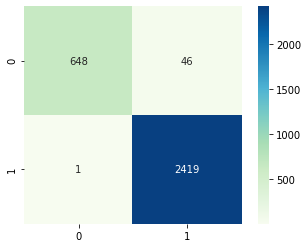

In [176]:
axes = sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

# explore wrong predictions

In [274]:
counter = 0
wrong_predictions = 0
for state, county, prediction, label in zip( X_test.STATE, X_test.COUNTY, predictions, y_test):
    if prediction != label:
        wrong_predictions +=1
        print('state={}, county={},    prediction={},    expected={}'.format(state, county, prediction, label))
    counter += 1
   
print('total_rows={}'.format(counter))
print('total_wrong_predictions={}'.format(wrong_predictions))

state=5, county=147,    prediction=1,    expected=0
state=8, county=15,    prediction=1,    expected=0
state=8, county=111,    prediction=1,    expected=0
state=12, county=65,    prediction=1,    expected=0
state=13, county=7,    prediction=1,    expected=0
state=13, county=239,    prediction=1,    expected=0
state=17, county=15,    prediction=1,    expected=0
state=17, county=85,    prediction=1,    expected=0
state=17, county=155,    prediction=1,    expected=0
state=19, county=39,    prediction=1,    expected=0
state=19, county=115,    prediction=1,    expected=0
state=19, county=131,    prediction=1,    expected=0
state=21, county=63,    prediction=1,    expected=0
state=24, county=3,    prediction=0,    expected=1
state=26, county=159,    prediction=1,    expected=0
state=27, county=23,    prediction=1,    expected=0
state=27, county=69,    prediction=1,    expected=0
state=27, county=73,    prediction=1,    expected=0
state=27, county=155,    prediction=1,    expected=0
state=28,